In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from empyrical_dist import Pmf
from empyrical_dist import Cdf
from scipy.stats import norm
from scipy import stats  
from sklearn.preprocessing import OneHotEncoder
import statsmodels.formula.api as smf

Import the data

In [2]:
dataframe = pd.read_csv("D:/Downloads/US_Accidents_Dec19.csv")
dataframe.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


list the variable names & associated data types

In [221]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 11 columns):
ID                   object
Severity             int64
City                 object
State                object
Weather_Condition    object
Temperature(F)       float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Sunrise_Sunset       object
dtypes: float64(5), int64(1), object(5)
memory usage: 249.6+ MB


Choose the variablies I will use, and drop the missing values.

ID:  an unique integer ID for each accident record.

Severity: an integer number which indicates the severity of the accident. It is from 1 to 4. 1 
         indicates the least impact on traffic and 4 indicates the most severity impact on traffic.

City: the city where the accident happened.

State: the state which the accident happened.

Temperature (F): the temperature of the place of the accident.

Weather_Condition: the weather condition of the place of the accident.

Humidity(%): the humidity in the place of the accident.

Pressure(in): the air pressure in the place of the accident. 

Visibility(mi): visibility in the place of the accident. 

Wind_Speed(mph): the wind speed in the place of the accident. 

Sunrise_Sunset: the period of day (day / night) based on sunrise and sunset in the place of the accident.

In [3]:
dataframe = dataframe.loc[ : , ['ID', 'Severity', 'City', 'State', 'Weather_Condition','Temperature(F)', 'Humidity(%)', 
                                 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Sunrise_Sunset'] ]
df = dataframe.dropna()
df.head()

,ID,Severity,City,State,Weather_Condition,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Sunrise_Sunset
2,A-3,2,Williamsburg,OH,Overcast,36.0,100.0,29.67,10.0,3.5,Night
3,A-4,3,Dayton,OH,Mostly Cloudy,35.1,96.0,29.64,9.0,4.6,Night
4,A-5,2,Dayton,OH,Mostly Cloudy,36.0,89.0,29.65,6.0,3.5,Day
5,A-6,3,Westerville,OH,Light Rain,37.9,97.0,29.63,7.0,3.5,Day
6,A-7,2,Dayton,OH,Overcast,34.0,100.0,29.66,7.0,3.5,Day


Print out the value counts of severity

In [222]:
df.Severity.value_counts()

2    1691170
3     739461
4      75108
1        804
Name: Severity, dtype: int64

Plot the number of accidents at different severity level.

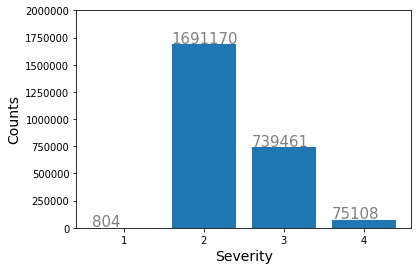

In [223]:
ax = plt.subplot(1,1,1)
ax.bar(df.Severity.value_counts().index, df.Severity.value_counts().values)
ax.set_xlabel('Severity', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks([1,2,3,4])
ax.set_ylim(0, 2000000)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+10000, \
            i.get_height(), fontsize=15,
                color='grey')

There is no outlier for the Severity variable.

In [6]:
sorted(df.Severity)[-10:]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [7]:
sorted(df.Severity)[: 10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Computer summary statistics.

In [8]:
mean = df.Severity.mean()
var = df.Severity.var()
std = df.Severity.std()
print('mean:', mean, '\nvariance:', var,'\nstandard deviation:', std)

mean: 2.354619331056713 
variance: 0.28943490178580694 
standard deviation: 0.5379915443441532


Plot a histogram with the variable Temperature, and you can see no ouliter in this variable.

Text(0, 0.5, 'Frequency')

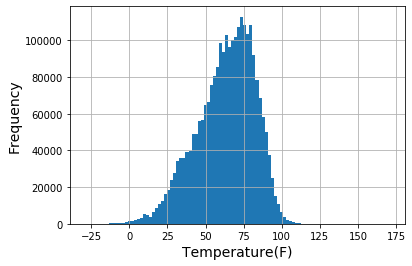

In [9]:
df['Temperature(F)'].hist(bins=100)
plt.xlabel('Temperature(F)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

Identify outliers.

In [10]:
sorted(df['Temperature(F)'])[-20:]

[118.4,
 122.0,
 122.0,
 122.0,
 123.8,
 127.4,
 129.2,
 129.2,
 129.2,
 129.2,
 132.6,
 136.4,
 136.4,
 136.4,
 140.0,
 143.6,
 161.6,
 167.0,
 168.8,
 170.6]

Check the largest Temperature, the highest temperature recorded in Illinois was 117 °F, the hottest temperature ever in Texas was 120 °F, the hottest temperature ever recorded in Nebraska was 118 °F, the highest temperature recorded in Connecticut was 106 °F, the hottest temperature ever recorded in Arizona was 128 °F, the hottest temperature ever recorded in Nevada was 125 °F. Thus, except for the 118.4 °F in TX, 118.4 °F in AZ, and 118.4 °F in NV, the rest of the temperature is out of the normal temperature range.

In [11]:
df[(df['Temperature(F)'] >= 118.4) & (df['Temperature(F)'] <= 170.6)]

,ID,Severity,City,State,Weather_Condition,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Sunrise_Sunset
177681,A-177683,3,La Salle,IL,Clear,132.6,100.0,29.80,10.0,16.1,Day
273855,A-273857,2,Pflugerville,TX,Clear,143.6,71.0,30.18,8.0,5.8,Day
273861,A-273863,2,Manor,TX,Clear,136.4,60.0,30.17,10.0,6.9,Day
273862,A-273864,2,Manor,TX,Clear,136.4,60.0,30.17,10.0,6.9,Day
289272,A-289275,2,Austin,TX,Clear,122.0,66.0,29.86,10.0,9.2,Day
289294,A-289297,2,Austin,TX,Clear,122.0,66.0,29.86,10.0,9.2,Day
289302,A-289305,2,Austin,TX,Clear,122.0,66.0,29.86,10.0,9.2,Day
289330,A-289333,2,Pflugerville,TX,Clear,118.4,65.0,29.86,10.0,6.9,Day
291722,A-291725,3,Austin,TX,Overcast,136.4,86.0,29.92,9.0,15.0,Day
292021,A-292024,2,Pflugerville,TX,Mostly Cloudy,161.6,96.0,30.00,10.0,8.1,Day


Remove the outliers.

In [12]:
df = df.drop([177681, 273855, 273861, 273862, 289272, 289294, 289302, 291722, 292021, 292040, 363913, 504594, 1296433, 
             1296437, 2264293, 2271076, 2271077, 2631256, 2750892])


Save the data.

In [13]:
df.to_csv('df_cleaned.csv')

Check the lowest Temperature, these accidents occured in MN, WI and IL, the lowest temperature ever in Minnesota was -60 °F,  the lowest temperature ever in Wisconsin was -59 °F, and the lowest temperature ever in Iowa was -44 °F, therefore, these temperature is within the normal temperature range.

In [14]:
sorted(df['Temperature(F)'])[:10]

[-29.0, -29.0, -29.0, -29.0, -27.9, -27.9, -27.9, -27.9, -27.9, -27.9]

In [15]:
df[(df['Temperature(F)'] >= -29.0) & (df['Temperature(F)'] <= -27.9)]

,ID,Severity,City,State,Weather_Condition,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Sunrise_Sunset
1089399,A-1089412,2,Elgin,IL,Clear,-27.9,85.0,30.46,4.0,4.6,Night
1089421,A-1089434,3,Bettendorf,IA,Clear,-29.0,81.0,30.49,10.0,3.5,Day
1200587,A-1200601,3,Clearwater,MN,Clear,-27.9,62.0,30.32,10.0,15.0,Night
1203018,A-1203032,2,Saint Paul,MN,Clear,-27.9,69.0,30.37,10.0,9.2,Night
1203020,A-1203034,2,Saint Paul,MN,Clear,-27.9,69.0,30.37,10.0,9.2,Night
1203021,A-1203035,2,Minneapolis,MN,Clear,-27.9,69.0,30.37,10.0,9.2,Night
1203079,A-1203093,2,Minneapolis,MN,Overcast,-27.9,65.0,30.34,9.0,12.7,Night
1203080,A-1203094,2,Minneapolis,MN,Overcast,-27.9,65.0,30.34,9.0,12.7,Night
1203081,A-1203095,2,Minneapolis,MN,Overcast,-27.9,65.0,30.34,9.0,12.7,Night
1203082,A-1203096,2,Minneapolis,MN,Mostly Cloudy,-27.9,65.0,30.35,10.0,10.4,Night


Computer summary statistics.

In [16]:
mean = df['Temperature(F)'].mean()
var = df['Temperature(F)'].var()
std = df['Temperature(F)'].std()
print('mean:', mean, '\nvariance:', var,'\nstandard deviation:', std)

mean: 63.00426769743121 
variance: 356.66038928762714 
standard deviation: 18.885454436884146


Plot a histogram with the variable Humidity

Text(0, 0.5, 'Frequency')

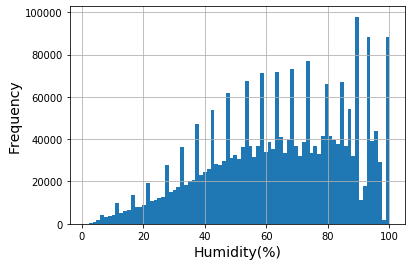

In [17]:
df['Humidity(%)'].hist(bins=80)
plt.xlabel('Humidity(%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

Identify outliers.

In [18]:
sorted(df['Humidity(%)'])[-10:]

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

Humidity equals to 100, which is in the normal range

In [19]:
df[(df['Humidity(%)'] == 100.0)]

,ID,Severity,City,State,Weather_Condition,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Sunrise_Sunset
2,A-3,2,Williamsburg,OH,Overcast,36.0,100.0,29.67,10.00,3.5,Night
6,A-7,2,Dayton,OH,Overcast,34.0,100.0,29.66,7.00,3.5,Day
7,A-8,3,Dayton,OH,Overcast,34.0,100.0,29.66,7.00,3.5,Day
9,A-10,3,Westerville,OH,Light Rain,37.4,100.0,29.62,3.00,4.6,Day
11,A-12,3,Reynoldsburg,OH,Light Rain,37.4,100.0,29.62,3.00,4.6,Day
...,...,...,...,...,...,...,...,...,...,...,...
2973752,A-2973776,2,Wolf Creek,OR,Fog,57.0,100.0,26.13,0.25,0.0,Day
2973907,A-2973931,2,Whitmore Lake,MI,Fair,53.0,100.0,29.25,10.00,3.0,Day
2973939,A-2973963,2,Rosedale,MD,Cloudy,72.0,100.0,29.98,10.00,3.0,Day
2973988,A-2974012,2,Punta Gorda,FL,Fair,77.0,100.0,29.97,10.00,7.0,Day


In [20]:
sorted(df['Humidity(%)'])[:10]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

There is no outlier in Humidity

In [21]:
df[(df['Humidity(%)'] == 1.0)]

,ID,Severity,City,State,Weather_Condition,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Sunrise_Sunset
1855155,A-1855178,2,Downingtown,PA,Fair,68.0,1.0,29.59,10.0,8.0,Day
2535698,A-2535722,2,Huntington Beach,CA,Fair,86.0,1.0,29.89,10.0,15.0,Day
2560852,A-2560876,2,Carlsbad,CA,Fair,77.0,1.0,29.71,10.0,18.0,Day
2560860,A-2560884,2,Carlsbad,CA,Fair,77.0,1.0,29.71,10.0,18.0,Day
2560938,A-2560962,2,Carlsbad,CA,Fair,75.0,1.0,29.72,10.0,16.0,Day
2560948,A-2560972,2,Carlsbad,CA,Fair,75.0,1.0,29.72,10.0,16.0,Day
2563775,A-2563799,2,Moreno Valley,CA,Fair,78.0,1.0,28.48,10.0,13.0,Day
2563813,A-2563837,2,Temecula,CA,Fair,79.0,1.0,28.64,10.0,5.0,Day
2563823,A-2563847,2,Perris,CA,Fair,81.0,1.0,28.45,10.0,14.0,Day
2563977,A-2564001,2,Murrieta,CA,Fair,82.0,1.0,28.60,10.0,5.0,Day


Computer summary statistics.

In [22]:
mean = df['Humidity(%)'].mean()
var = df['Humidity(%)'].var()
std  = df['Humidity(%)'].std()
print('mean:', mean, '\nvariance:', var,'\nstandard deviation:', std)

mean: 64.2574262323662 
variance: 501.5257759736768 
standard deviation: 22.394771174845186


Plot a histogram with the Pressure variable.

Text(0, 0.5, 'Frequency')

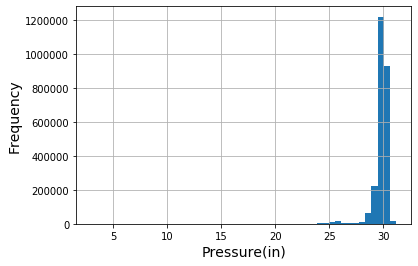

In [170]:
df['Pressure(in)'].hist(bins=50)
plt.xlabel('Pressure(in)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

Identify outliers.

In [24]:
sorted(df['Pressure(in)'])[-10:]

[31.08, 31.1, 31.1, 31.1, 31.12, 31.12, 31.12, 31.12, 31.15, 31.15]

In [25]:
sorted(df['Pressure(in)'])[:10]

[0.0, 0.02, 0.29, 0.29, 0.39, 2.99, 2.99, 2.99, 2.99, 2.99]

When the air pressure is below 1.59 inch of mercury, human is difficult to adapt it, so 0.0in, 0.02in, 0.29in and 0.30in are not normal, these are outliers.

In [26]:
df[(df['Pressure(in)'] >= 0.0) & (df['Pressure(in)']  <= 2.99)] 

,ID,Severity,City,State,Weather_Condition,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Sunrise_Sunset
1035156,A-1035168,2,Rembert,SC,Overcast,35.6,100.0,0.00,2.2,8.1,Day
1420312,A-1420328,2,San Antonio,TX,Heavy Rain,75.2,94.0,0.39,3.0,15.0,Night
1420314,A-1420330,2,San Antonio,TX,Heavy Rain,75.2,94.0,0.29,6.0,12.7,Night
1420316,A-1420332,2,San Antonio,TX,Heavy Rain,74.5,95.0,0.29,3.0,10.4,Night
1823013,A-1823036,2,La Puente,CA,Clear,82.4,15.0,2.99,10.0,5.8,Day
1823016,A-1823039,3,Azusa,CA,Clear,82.4,15.0,2.99,10.0,5.8,Day
1823017,A-1823040,2,South El Monte,CA,Clear,82.4,15.0,2.99,10.0,5.8,Day
1823020,A-1823043,2,South El Monte,CA,Clear,82.4,15.0,2.99,10.0,5.8,Day
2405116,A-2405140,2,Verbena,AL,Clear,57.2,25.0,0.02,10.0,5.8,Day
2844673,A-2844697,2,Whittier,CA,Clear,80.6,8.0,2.99,10.0,6.9,Day


Remove the outlier, and save the data.

In [27]:
df = df.drop([1035156, 1420312, 1420314, 1420316, 2405116])
df.to_csv('df_cleaned.csv')

Computer summary statistics.

In [28]:
mean = df['Pressure(in)'].mean()
var = df['Pressure(in)'].var()
std = df['Pressure(in)'].std()
print('mean:', mean, '\nvariance:', var,'\nstandard deviation:', std)

mean: 29.796351399656984 
variance: 0.571633822430841 
standard deviation: 0.7560646946067784


Plot a histogram with the variable Visibility.

Text(0, 0.5, 'Frequency')

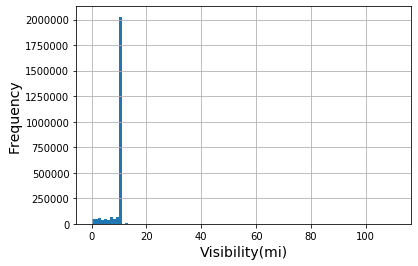

In [168]:
df['Visibility(mi)'].hist(bins=50)
plt.xlabel('Visibility(mi)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

Identify outliers.

In [30]:
sorted(df['Visibility(mi)'])[:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [31]:
df[(df['Visibility(mi)'] == 0.0)]

,ID,Severity,City,State,Weather_Condition,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Sunrise_Sunset
117155,A-117157,2,Orlando,FL,Overcast,57.0,93.0,30.13,0.0,10.4,Night
117158,A-117160,2,Saint Cloud,FL,Overcast,57.0,93.0,30.13,0.0,10.4,Night
117173,A-117175,2,Orlando,FL,Overcast,55.9,97.0,30.14,0.0,10.4,Day
117609,A-117611,3,Orlando,FL,Fog,66.9,97.0,30.11,0.0,8.1,Night
117624,A-117626,2,Orlando,FL,Fog,66.9,100.0,30.12,0.0,6.9,Day
...,...,...,...,...,...,...,...,...,...,...,...
2973264,A-2973288,2,Azalea,OR,Fog,56.0,100.0,26.15,0.0,0.0,Day
2973266,A-2973290,2,Grants Pass,OR,Fog,56.0,100.0,26.15,0.0,0.0,Day
2973276,A-2973300,2,Azalea,OR,Fog,56.0,97.0,26.15,0.0,5.0,Day
2973277,A-2973301,2,Glendale,OR,Fog,56.0,97.0,26.15,0.0,5.0,Day


In [32]:
sorted(df['Visibility(mi)'])[-10:]

[90.0, 90.0, 90.0, 90.0, 90.0, 101.0, 105.0, 111.0, 111.0, 111.0]

Light rain can not have great visibility, 105 mi is not normal, thus I think this is an outlier.

In [33]:
df[(df['Visibility(mi)'] >=90.0) & (df['Visibility(mi)'] <= 111.0)] 

,ID,Severity,City,State,Weather_Condition,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Sunrise_Sunset
220824,A-220826,2,Scarsdale,NY,Light Rain,75.9,85.0,30.02,105.0,12.7,Day
301381,A-301384,2,Dallas,TX,Scattered Clouds,93.2,49.0,30.11,111.0,5.8,Day
301384,A-301387,3,Dallas,TX,Scattered Clouds,93.2,49.0,30.11,111.0,5.8,Day
890392,A-890401,2,Ione,CA,Fair,75.0,53.0,29.70,101.0,3.0,Day
1055897,A-1055909,2,Edwards,CA,Partly Cloudy,63.1,17.0,30.12,90.0,13.8,Day
1078967,A-1078980,2,Edwards,CA,Mostly Cloudy,45.5,100.0,30.12,90.0,10.4,Day
1136643,A-1136657,2,Edwards,CA,Partly Cloudy,47.5,31.0,30.01,90.0,3.5,Day
2275831,A-2275855,3,Plano,TX,Scattered Clouds,93.2,49.0,30.11,111.0,5.8,Day
2515512,A-2515536,2,Edwards,CA,Partly Cloudy,49.0,29.0,27.89,90.0,13.0,Day
2515589,A-2515613,2,Edwards,CA,Partly Cloudy,52.0,23.0,27.85,90.0,12.0,Day


Remove the outlier, and save the data.

In [34]:
df = df.drop([220824])
df.to_csv('df_cleaned.csv')

Computer summary statistics.

In [35]:
mean = df['Visibility(mi)'].mean()
var = df['Visibility(mi)'].var()
std = df['Visibility(mi)'].std()
print('mean:', mean, '\nvariance:', var,'\nstandard deviation:', std)

mean: 9.198734604237425 
variance: 7.869277748728127 
standard deviation: 2.805223297480635


Plot a histogram with the variable Wind_Speed

Text(0, 0.5, 'Frequency')

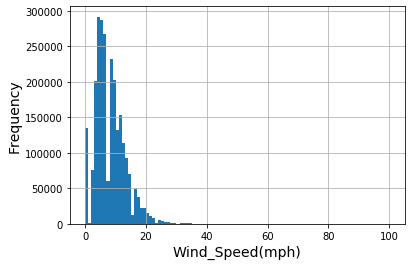

In [165]:
df['Wind_Speed(mph)'].hist(bins=100)
plt.xlabel('Wind_Speed(mph)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

Identify outliers.

In [37]:
sorted(df['Wind_Speed(mph)'])[:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [38]:
df[(df['Wind_Speed(mph)'] == 0.0)]

,ID,Severity,City,State,Weather_Condition,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Sunrise_Sunset
43488,A-43489,3,Calimesa,CA,Fair,70.0,60.0,28.34,10.0,0.0,Night
44266,A-44267,3,Castaic,CA,Cloudy,63.0,90.0,29.02,4.0,0.0,Day
44410,A-44411,2,Canyon Country,CA,Fair,65.0,84.0,29.01,8.0,0.0,Night
44568,A-44569,2,Newhall,CA,Fair,84.0,49.0,29.07,10.0,0.0,Day
44570,A-44571,2,Canyon Country,CA,Fair,84.0,49.0,29.07,10.0,0.0,Day
...,...,...,...,...,...,...,...,...,...,...,...
2974299,A-2974323,2,Claremont,CA,Cloudy,64.0,88.0,28.84,3.0,0.0,Day
2974302,A-2974326,2,Los Angeles,CA,Fair,81.0,49.0,29.66,8.0,0.0,Day
2974305,A-2974329,2,Los Angeles,CA,Fair,82.0,47.0,29.65,9.0,0.0,Day
2974316,A-2974340,2,Sylmar,CA,Fair,82.0,39.0,28.78,10.0,0.0,Day


In [39]:
sorted(df['Wind_Speed(mph)'])[-80:]

[79.4,
 85.2,
 97.8,
 99.0,
 100.1,
 100.1,
 100.1,
 100.1,
 110.0,
 110.5,
 113.0,
 113.0,
 114.0,
 116.0,
 116.2,
 116.2,
 119.7,
 119.7,
 123.1,
 123.1,
 124.3,
 124.3,
 124.3,
 125.4,
 126.6,
 126.6,
 126.6,
 126.6,
 126.6,
 126.6,
 127.0,
 127.7,
 128.9,
 130.0,
 130.0,
 130.0,
 135.8,
 141.5,
 142.0,
 142.0,
 142.0,
 142.7,
 157.0,
 161.0,
 161.0,
 162.3,
 162.3,
 166.9,
 169.0,
 169.0,
 174.9,
 174.9,
 175.0,
 175.0,
 175.0,
 208.3,
 214.0,
 214.0,
 230.0,
 230.0,
 230.0,
 230.0,
 241.7,
 245.1,
 254.3,
 254.3,
 255.0,
 328.0,
 471.8,
 580.0,
 580.0,
 703.1,
 703.1,
 822.8,
 822.8,
 822.8,
 822.8,
 822.8,
 822.8,
 822.8]

It is unrealistic for a car to drive at wind speed larger than 110 mph, so these are outliers.

In [40]:
df[(df['Wind_Speed(mph)'] >= 110.0) & (df['Wind_Speed(mph)'] <= 822.8)] 

,ID,Severity,City,State,Weather_Condition,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Sunrise_Sunset
17802,A-17803,2,Sacramento,CA,Overcast,59.0,72.0,29.96,10.0,142.7,Day
64265,A-64267,2,Claremont,CA,Light Rain,51.8,100.0,29.49,4.0,241.7,Day
113136,A-113138,2,Walnut,CA,Clear,75.2,53.0,29.92,10.0,123.1,Day
113152,A-113154,2,Glendora,CA,Clear,75.2,53.0,29.92,10.0,123.1,Day
114585,A-114587,3,Sylmar,CA,Clear,71.6,53.0,30.06,10.0,822.8,Day
...,...,...,...,...,...,...,...,...,...,...,...
2947761,A-2947785,2,Rialto,CA,Fair / Windy,91.0,31.0,28.68,10.0,142.0,Day
2947765,A-2947789,2,San Bernardino,CA,Fair / Windy,91.0,31.0,28.68,10.0,142.0,Day
2947782,A-2947806,2,Redlands,CA,Fair / Windy,91.0,31.0,28.68,10.0,142.0,Day
2956507,A-2956531,2,Aberdeen Proving Ground,MD,Light Rain / Windy,73.0,94.0,29.86,7.0,110.0,Day


Remove the outliers, and save the data.

In [41]:
df = df[df['Wind_Speed(mph)'] < 110.0]
df.to_csv('df_cleaned.csv')

Computer summary statistics.

In [42]:
mean = df['Wind_Speed(mph)'].mean()
var = df['Wind_Speed(mph)'].var()
std = df['Wind_Speed(mph)'].std()
print('mean:', mean, '\nvariance:', var,'\nstandard deviation:', std)

mean: 8.292442140441423 
variance: 23.203301549803427 
standard deviation: 4.816980542809305


Text(0, 0.5, 'Frequency')

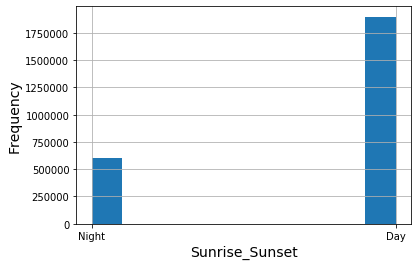

In [156]:
df['Sunrise_Sunset'].hist()
plt.xlabel('Sunrise_Sunset', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

In [171]:
counts = df.groupby(df.Weather_Condition).count().City
accident_counts = counts.sort_values(ascending=False)
a.head(n=20)

Weather_Condition
Clear                           614896
Mostly Cloudy                   372249
Fair                            329959
Overcast                        321533
Partly Cloudy                   266125
Scattered Clouds                176032
Light Rain                      128491
Cloudy                          114153
Light Snow                       38959
Rain                             29505
Haze                             25466
Fog                              16166
Heavy Rain                       11142
Light Drizzle                     9140
Light Thunderstorms and Rain      4475
Snow                              4272
Thunderstorm                      4049
Fair / Windy                      3720
Smoke                             2783
Heavy Thunderstorms and Rain      2345
Name: City, dtype: int64

Create a Pmf object, the visibility for accidents which are level 2 severity.

In [43]:
pmf_vis_2 = Pmf.from_seq(df['Visibility(mi)'][df.Severity == 2])

In [44]:
pmf_vis_2.normalize()

1.0

In [45]:
pmf_vis_2

,probs
0.00,3.606970e-04
0.06,1.892181e-05
0.10,3.435491e-04
0.12,1.224005e-04
0.19,1.773920e-06
...,...
76.00,1.182613e-06
80.00,2.306096e-05
90.00,2.956533e-06
101.00,5.913066e-07


Create a Pmf object, the visibility for accidents which are level 3 severity.

In [46]:
pmf_vis_3 = Pmf.from_seq(df['Visibility(mi)'][df.Severity == 3])
pmf_vis_3.normalize()

1.0

Because the number of severity 4 case are small, so I compare severity 2 and severity 3. Make a PMF of visibility for accidents of severity 2 and accidents of severity 3.

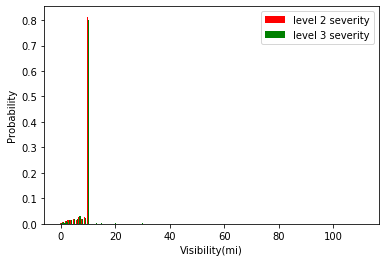

In [47]:
plt.bar(pmf_vis_2.qs-0.4, pmf_vis_2.ps, width=0.4, color='red', label='level 2 severity')
plt.bar(pmf_vis_3.qs, pmf_vis_3.ps,width=0.4, color='green', label= 'level 3 severity')
plt.xlabel('Visibility(mi)')
plt.ylabel('Probability')
plt.legend()

Zoom the most part of plot to see clearly.

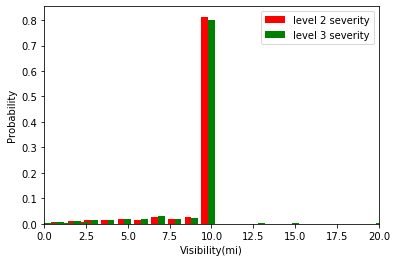

In [48]:
plt.bar(pmf_vis_2.qs-0.4, pmf_vis_2.ps, width=0.4, color='red', label='level 2 severity')
plt.bar(pmf_vis_3.qs, pmf_vis_3.ps,width=0.4, color='green', label= 'level 3 severity')
plt.xlabel('Visibility(mi)')
plt.ylabel('Probability')
plt.xlim(0, 20)
plt.legend()

Create a function to calculate cdf from pmf.

In [154]:
def pmf_cdf(pmf):
    cdf_list = []
    cdf = 0
    for i in range(len(pmf.qs)):
        cdf = cdf+pmf.ps[i]
        cdf_list.append(cdf)
    return cdf_list

It looks like there is barely any different between severity 2 and severity 3 in visibility. 

Text(0, 0.5, 'CDF')

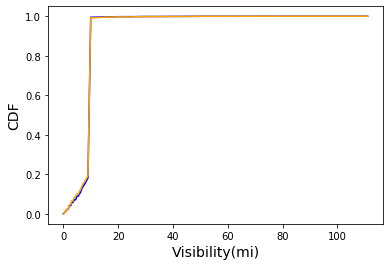

In [155]:
plt.plot(pmf_vis_2.qs, pmf_cdf(pmf_vis_2), color = "blue")
plt.plot(pmf_vis_3.qs, pmf_cdf(pmf_vis_3), color = "orange")
plt.xlabel('Visibility(mi)', fontsize=14)
plt.ylabel('CDF', fontsize=14)

Here is the Temperature PDF and the normal distribution PDF, it is a little bit skewed.

(0, 0.04)

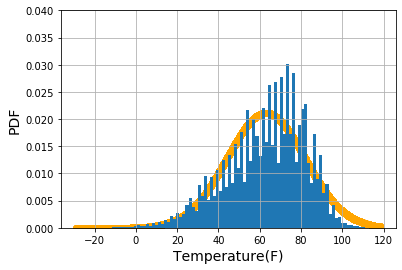

In [52]:
gauss = norm(loc=df['Temperature(F)'].mean(), scale=df['Temperature(F)'].std())
r = gauss.pdf(df['Temperature(F)'])
plt.scatter(df['Temperature(F)'], r, color='orange')
df['Temperature(F)'].hist(bins=100, density=True)
plt.xlabel('Temperature(F)', fontsize=14)
plt.ylabel('PDF', fontsize=14)
plt.ylim(0, 0.04)

In [53]:
pmf_tem = Pmf.from_seq(df['Temperature(F)'])
pmf_tem.normalize()

1.0

Here's the Temperature CDF and the model. The model fits the data well.

Text(0, 0.5, 'CDF')

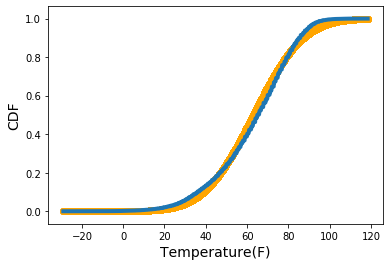

In [218]:
r1 = gauss.cdf(df['Temperature(F)'])
plt.scatter(df['Temperature(F)'], r1, color='orange')
plt.plot(pmf_tem.qs, pmf_cdf(pmf_tem), lw=4)
plt.xlabel('Temperature(F)', fontsize=14)
plt.ylabel('CDF', fontsize=14)

Make a scatter plot to find the relationship between Severity and Wind Speed.

Text(0, 0.5, 'Severity')

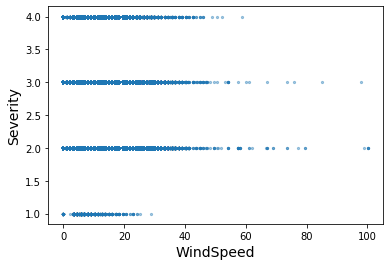

In [55]:
plt.scatter(df['Wind_Speed(mph)'], df['Severity'], alpha = 0.4, s=5)
plt.xlabel('WindSpeed', fontsize=14)
plt.ylabel('Severity', fontsize=14)

The following function computes the covariance of two variables using NumPy's dot function.

In [56]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

Comouter the covariance of wind speed and severity. 

In [57]:
Cov(df['Wind_Speed(mph)'], df['Severity'])

0.08298516215740964

The variables are not normal, thus I calculate Spearman's rank correlation. 

In [58]:
def SpearmanCorr(x,y):
    xranks = pd.Series(x).rank()
    yranks = pd.Series(y).rank()
    return stats.spearmanr(xranks, yranks)

There are have positive correlations, and the correlations are very small.

In [59]:
SpearmanCorr(df['Wind_Speed(mph)'], df['Severity'])

SpearmanrResult(correlation=0.0336191945409709, pvalue=0.0)

Make a scatter plot to find the relationship  between Severity and Pressure.

Text(0, 0.5, 'Severity')

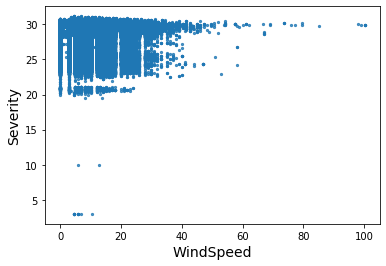

In [60]:
plt.scatter(df['Wind_Speed(mph)'], df['Pressure(in)'], alpha = 0.8, s=5)
plt.xlabel('WindSpeed', fontsize=14)
plt.ylabel('Severity', fontsize=14)

Computer the covariance of pressure and severity.

In [61]:
Cov(df['Pressure(in)'], df['Severity'])

0.007408142800425819

The variables are not normal, I calculate Spearman's rank correlation, the result is positive, thus these two variables change in the same direction, and the correlation is very small.

In [62]:
SpearmanCorr(df['Pressure(in)'], df['Severity'])

SpearmanrResult(correlation=0.035982135088561365, pvalue=0.0)

In [109]:
SpearmanCorr(df['Temperature(F)'], df['Severity'])

SpearmanrResult(correlation=-0.021255618735392178, pvalue=2.5628800683405247e-248)

In [108]:
SpearmanCorr(df['Humidity(%)'], df['Severity'])

SpearmanrResult(correlation=0.019644566050478172, pvalue=2.100728759192654e-212)

In [111]:
SpearmanCorr(df['Visibility(mi)'], df['Severity'])

SpearmanrResult(correlation=-0.010302852957456065, pvalue=8.113452396102279e-60)

Hypothsis: There is no relationship between Severity and Humidity.

In [63]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=100):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]
        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [64]:
class CorrelationPermute(HypothesisTest):

    def TestStatistic(self, data):
        x, y = data
        xranks = pd.Series(x).rank()
        yranks = pd.Series(y).rank()
        test_stat = stats.spearmanr(xranks, yranks) #abs()
        return test_stat

    def RunModel(self):
        x, y = self.data
        x = np.random.permutation(x)
        return x, y

The p-value is 0, so it is significant, I reject my hypothesis.

In [65]:
data = df['Humidity(%)'],  df['Severity']
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

Encode categorical features as a one-fot numric array.

In [69]:
enc = OneHotEncoder()
x = pd.get_dummies(df['Sunrise_Sunset'])
x

,Day,Night
2,0,1
3,0,1
4,1,0
5,1,0
6,1,0
...,...,...
2974330,1,0
2974331,1,0
2974332,1,0
2974333,1,0


In [96]:
df_new = pd.concat([df, x], axis=1)

Drop the variables not used.

In [97]:
df_new.drop(['ID', 'City', 'State', 'Weather_Condition', 'Sunrise_Sunset'], axis=1, inplace=True)
df_new

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Day,Night
2,2,36.0,100.0,29.67,10.0,3.5,0,1
3,3,35.1,96.0,29.64,9.0,4.6,0,1
4,2,36.0,89.0,29.65,6.0,3.5,1,0
5,3,37.9,97.0,29.63,7.0,3.5,1,0
6,2,34.0,100.0,29.66,7.0,3.5,1,0
...,...,...,...,...,...,...,...,...
2974330,2,86.0,40.0,28.92,10.0,13.0,1,0
2974331,2,70.0,73.0,29.39,10.0,6.0,1,0
2974332,2,73.0,64.0,29.74,10.0,10.0,1,0
2974333,2,71.0,81.0,29.62,10.0,8.0,1,0


Rename some variables

In [101]:
df_new = df_new.rename({'Temperature(F)' : 'Temperature', 'Humidity(%)' : 'Humidity', 
                        'Pressure(in)' : 'Pressure', 'Visibility(mi)' : 'Visibility', 
                        'Wind_Speed(mph)' : 'Wind_Speed'}, axis='columns')
df_new.head()

,Severity,Temperature,Humidity,Pressure,Visibility,Wind_Speed,Day,Night
2,2,36.0,100.0,29.67,10.0,3.5,0,1
3,3,35.1,96.0,29.64,9.0,4.6,0,1
4,2,36.0,89.0,29.65,6.0,3.5,1,0
5,3,37.9,97.0,29.63,7.0,3.5,1,0
6,2,34.0,100.0,29.66,7.0,3.5,1,0


Run a multiple linear regression.

In [106]:
formula = ('Severity ~ Temperature + Humidity + Pressure + Visibility +  Wind_Speed + Day + Night')
results = smf.ols(formula, data=df_new).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2584.
Date:                Sat, 30 May 2020   Prob (F-statistic):               0.00
Time:                        14:40:02   Log-Likelihood:            -1.9951e+06
No. Observations:             2506543   AIC:                         3.990e+06
Df Residuals:                 2506536   BIC:                         3.990e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.3242      0.009    146.401      0.000       1.306       1.342
Temperature    -0.0002   1.96e-05    -11.848      0.000      -0.000      -0.000
Humidity        0.0003   1.75e-05     16.932      0.000       0.000       0.000
Pressure        0.0115      0.000     25.605      0.000       0.011       0.012
Visibility      0.0003      0.000      2.379      0.017    5.51e-05       0.001
Wind_Speed      0.0046   7.19e-05     64.014      0.000       0.004       0.005
Day             0.6223      0.005    136.779      0.000       0.613       0.631
Night           0.7019      0.005    154.804      0.000       0.693       0.711
==============================================================================
Omnibus:                   376155.620   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           571495.413
Skew:                           1.156   Prob(JB):                         0.00
Kurtosis:                       3.360   Cond. No.                     7.20e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.54e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [112]:
SpearmanCorr(df_new['Day'], df_new['Severity'])

SpearmanrResult(correlation=-0.057134882487460036, pvalue=0.0)

In [113]:
SpearmanCorr(df_new['Night'], df_new['Severity'])

SpearmanrResult(correlation=0.057134882487460036, pvalue=0.0)